In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
# Load data
edge_list = pd.read_csv('data/graph_data.csv')
centrality_scores = pd.read_csv('data/centrality.csv')
clusters = pd.read_csv('data/clusters.csv')

print(edge_list.head())
print(centrality_scores.head())
print(clusters.head())

    0   1
0   2   3
1   4   5
2   6   7
3   8   9
4  10  11
    node  centrality
0  13181    0.000046
1   1909    0.000046
2  20750    0.000046
3  15254    0.000046
4   1897    0.000046
   cluster_id  node
0           0     0
1           0     1
2           0     2
3           0     3
4           0     4


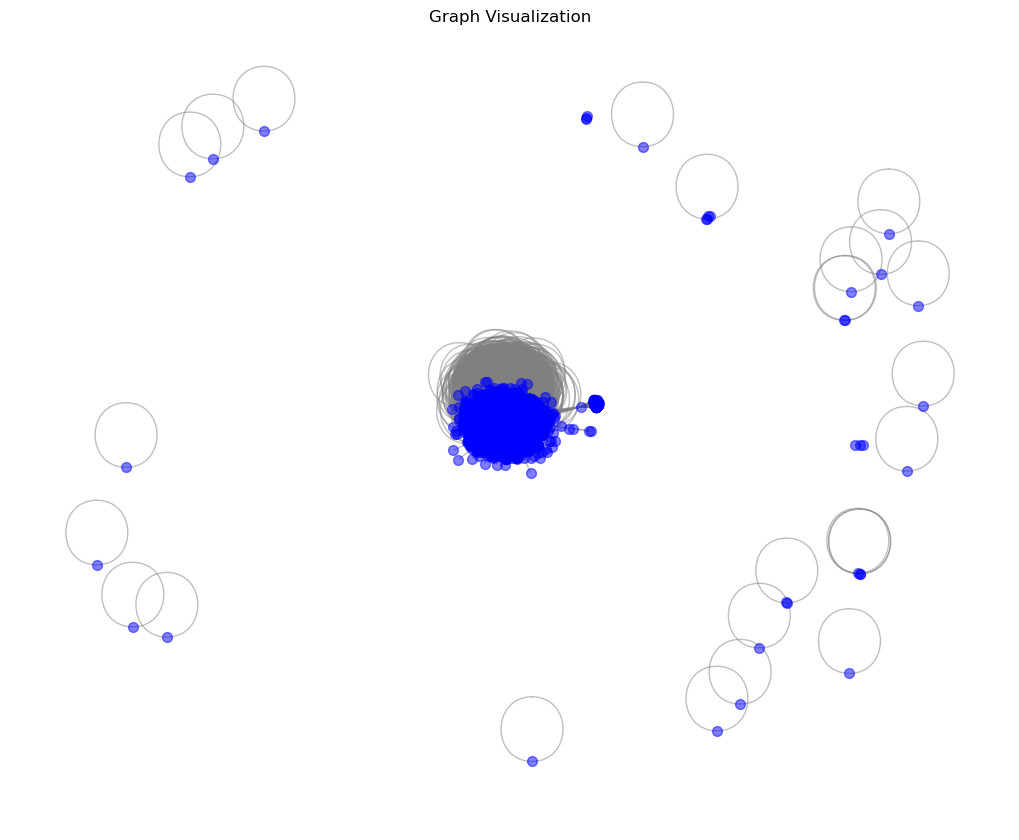

In [23]:
G = nx.from_pandas_edgelist(df, "0", "1")

# Visualize the graph with basic layout
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, alpha=0.5, edge_color='gray', node_color='blue', with_labels=False)
plt.title('Graph Visualization')
plt.show()

In [26]:
# Add centrality scores to the graph nodes as attributes
centrality_dict = centrality_scores.set_index('node')['centrality'].to_dict()
nx.set_node_attributes(G, centrality_dict, 'centrality')

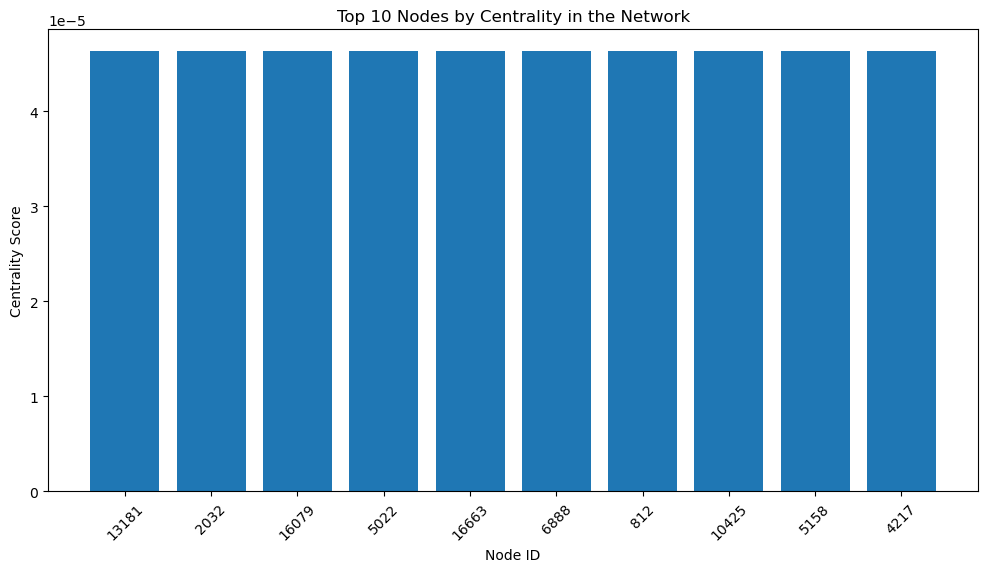

In [31]:
# Identify the nodes with the highest centrality scores
top_centrality_nodes = centrality_data.sort_values(by='centrality', ascending=False).head(10)
top_centrality_nodes
# Plot the centrality scores of the top nodes
plt.figure(figsize=(12, 6))
plt.bar(top_centrality_nodes['node'].astype(str), top_centrality_nodes['centrality'])
plt.xlabel('Node ID')
plt.ylabel('Centrality Score')
plt.title('Top 10 Nodes by Centrality in the Network')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Load the data with disease association
associations_data = pd.read_csv('data/preprocessed_associations.csv', header=None)
associations_data.columns = ['CUI', 'Disease', 'Gene']
associations_data.head(), associations_data['Gene'].value_counts().head(10)


(        CUI                   Disease  Gene
 0  C0036095  Salivary Gland Neoplasms  1462
 1  C0036095  Salivary Gland Neoplasms  1612
 2  C0036095  Salivary Gland Neoplasms   182
 3  C0036095  Salivary Gland Neoplasms  2011
 4  C0036095  Salivary Gland Neoplasms  2019,
 Gene
 7124    115
 6648     96
 5743     83
 3569     79
 7157     68
 3553     61
 7040     58
 4524     56
 7422     50
 5443     49
 Name: count, dtype: int64)

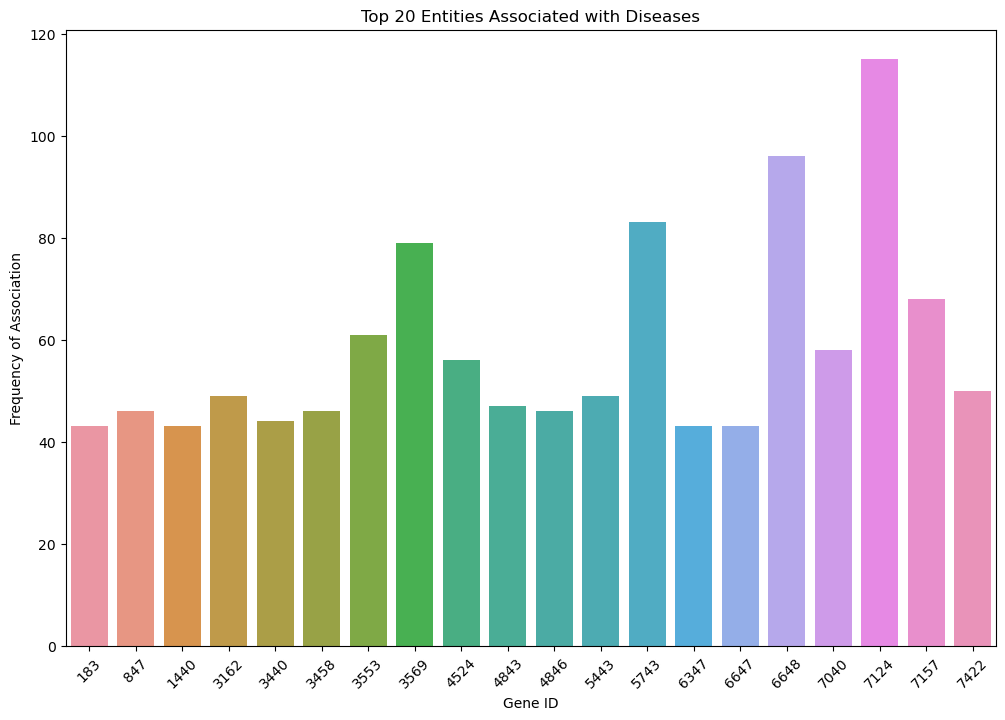

In [45]:
entity_counts = associations_data['Gene'].value_counts().head(20)

# Create a bar plot for the top 20 entities
plt.figure(figsize=(12, 8))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Top 20 Entities Associated with Diseases')
plt.xlabel('Gene ID')
plt.ylabel('Frequency of Association')
plt.xticks(rotation=45)
plt.show()
